<a href="https://colab.research.google.com/github/dlee1982/audit_accounting/blob/main/High_Level_Data_Overview_Tests_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
def read_files(file_name): 
    """
    read in the workbooks individual worksheets and combine into one csv file
    """
    
    #reads in the current workbook and all the worksheets into a dictionary
    cur_read_file = pd.read_excel(file_name, sheet_name=None)
    combined_file = pd.DataFrame()
    
    #reads in each worksheets and combines into one workbook
    for sheet in cur_read_file: 
        cur_sheet = cur_read_file[f'{sheet}']
        combined_file = pd.concat([cur_sheet, combined_file])
        
    return combined_file 

In [ ]:
def data_profiling(return_series: pd.Series): 
  """
  profiles the data into distinct categories: 
  1. >= 50
  2. >= 10 and <= 49.99: greater than or equal to 10 and less than or equal to 49.99
  3. >= 0.01 and <= 9.99 : greater than or equal to 0.01 and less than or equal ot 9.99
  4. = 0 : equal to 0
  5. <= -0.01 and <= -9.99 : less than or equal to -0.01 and less than or equal to -9.99
  6. <= -10 : less than or equal to -10
  """
  
  equal_50 = return_series[return_series >= 50].count()
  equal_10_49 = return_series[(return_series >= 10) & (return_series <= 49.99)].count()
  equal_1_9 = return_series[(return_series >= 0.01) & (return_series <= 9.99)].count() 
  equal_0 = return_series[return_series == 0].count()
  equal_neg_9 = return_series[(return_series <= -0.01) & (return_series <= -9.99)].count()
  equal_neg_10 = return_series[return_series <= -10].count()
  totals = [equal_50, equal_10_49, equal_1_9, equal_0, equal_neg_9, equal_neg_10]
  categories = ['>=50', '>= 10 and <= 49.99', '>= 0.01 and <= 9.99', '= 0', '<= -0.01 and <= -9.99', '<= -10']
  return pd.DataFrame({'Categories': categories, 'Profile_Totals': totals})

In [ ]:
# imports each file in the current directory where vendor payment data is located
files = os.listdir()
v_files = [file for file in files if file[-16:] == "Vendor_data.xlsx"]
v_files

['fy2018_Vendor_data.xlsx',
 'fy2020_Vendor_data.xlsx',
 'fy2017_Vendor_data.xlsx',
 'fy2019_Vendor_data.xlsx',
 'fy2016_Vendor_data.xlsx']

In [ ]:
# combines all the fiscal year's files into one dataframe
all_files = pd.DataFrame()

for file in v_files: 
  temp = read_files(file)
  all_files = pd.concat([all_files, temp])

all_files.head()

,DEPT CODE,FY,FUND,DEPT NAME,NAME,ALIAS,ADDRESS1,ADDRESS2,CITY,ST,ZIP,OBJ,OBJECT NAME,AMOUNT
0,95F,2018,10,MAINE COMMISSION ON INDIGENT L,1820 LAW LLC,NaN,C/O 1820 LAW LLC,36 OSSIPEE TRAIL W,STANDISH,ME,04084,4040,COURT APPOINTED ATTORNEYS,-926.00
1,95F,2018,10,MAINE COMMISSION ON INDIGENT L,64 STATE ST LLC,NaN,C/O STEPHEN J BOURGET ESQ,64 STATE ST,AUGUSTA,ME,04330,4040,COURT APPOINTED ATTORNEYS,"-113,598.54"
2,95F,2018,10,MAINE COMMISSION ON INDIGENT L,AARON BLASCHKE ROWDEN ESQ,AARON BLASCHKE ROWDEN ESQ,PO BOX 2912,NaN,WATERVILLE,ME,04903,4040,COURT APPOINTED ATTORNEYS,"-7,944.00"
3,95F,2018,10,MAINE COMMISSION ON INDIGENT L,AARON FETHKE,NaN,,,,,,4040,COURT APPOINTED ATTORNEYS,"-6,131.75"
4,95F,2018,10,MAINE COMMISSION ON INDIGENT L,AARON M FREY,NaN,,,,,,4040,COURT APPOINTED ATTORNEYS,"-59,642.11"


In [ ]:
# converts the amount column to numeric from object
all_files['Amount1'] = all_files['AMOUNT']
all_files['Amount1'] = pd.to_numeric(all_files['Amount1'], errors='coerce')
all_files['AMOUNT'] = all_files['AMOUNT'].str.replace(",", "")
all_files.loc[all_files['Amount1'].isna(), ['Amount1']]  = all_files.loc[all_files['Amount1'].isna()]['AMOUNT'] 
all_files['Amount2'] = pd.to_numeric(all_files['Amount1'], errors='ignore')

In [ ]:
cat = data_profiling(all_files['Amount2'])
cat

,Categories,Profile_Totals
0,>=50,194625
1,>= 10 and <= 49.99,63985
2,>= 0.01 and <= 9.99,15271
3,= 0,3044
4,<= -0.01 and <= -9.99,67917
5,<= -10,67912


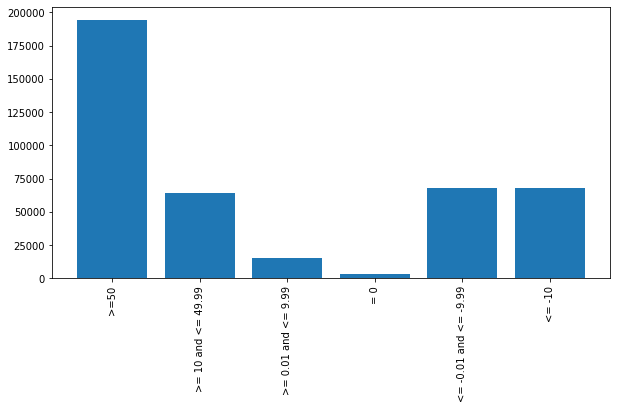

In [ ]:
import matplotlib.pyplot as plt

ax, fig = plt.subplots(figsize=(10, 5))
_ = plt.bar(cat['Categories'], cat['Profile_Totals'])
_ = plt.xticks(rotation=90)

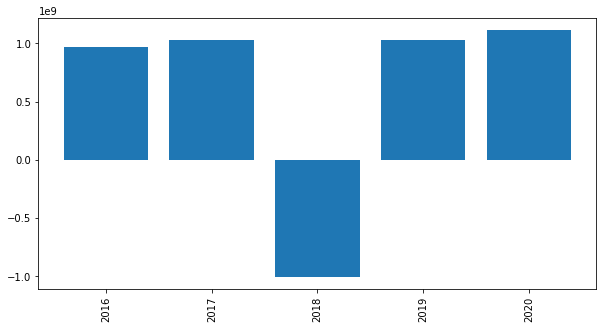

In [ ]:
pay_years = all_files.groupby(['FY']).agg({'Amount2':'sum'}).reset_index()

ax, fig = plt.subplots(figsize=(10, 5))
_ = plt.bar(pay_years['FY'], pay_years['Amount2'])
_ = plt.xticks(rotation=90)

In [ ]:
all_files.loc[all_files['FY'] == 2018, 'Amount2'] = all_files.loc[all_files['FY'] == 2018]['Amount2'] * -1

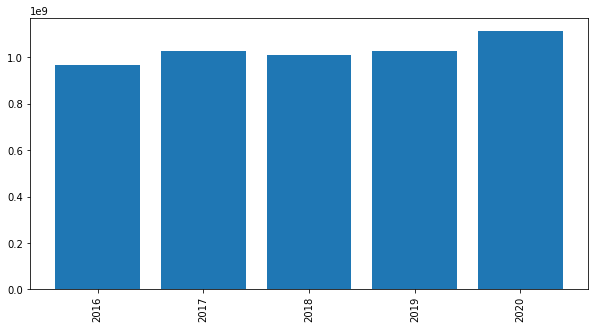

In [ ]:
pay_years = all_files.groupby(['FY']).agg({'Amount2':'sum'}).reset_index()
ax, fig = plt.subplots(figsize=(10, 5))
_ = plt.bar(pay_years['FY'], pay_years['Amount2'])
_ = plt.xticks(rotation=90)

In [ ]:
cat = data_profiling(all_files['Amount2'])
cat

,Categories,Profile_Totals
0,>=50,244396
1,>= 10 and <= 49.99,80197
2,>= 0.01 and <= 9.99,19065
3,= 0,3044
4,<= -0.01 and <= -9.99,1929
5,<= -10,1929


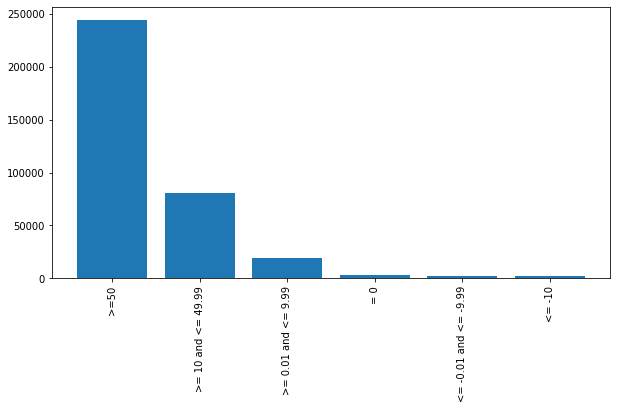

In [ ]:
ax, fig = plt.subplots(figsize=(10, 5))
_ = plt.bar(cat['Categories'], cat['Profile_Totals'])
_ = plt.xticks(rotation=90)